In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
team_pace_df = pd.read_csv('../data/Team_pace.csv')
league_pace_df = pd.read_csv('../data/League_pace.csv')
maxey_speed_df = pd.read_csv('../data/maxey_speed.csv')
team_transition_points_df = pd.read_csv('../data/teams_transition_points.csv')
player_transition_points_df = pd.read_csv('../data/player_transition_points.csv')

### Analysis

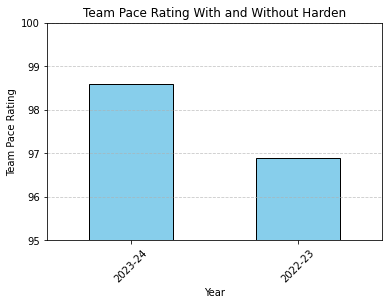

In [3]:
team_pace_df.set_index('Year')['Pace'].plot(kind='bar', ylim=(95, 100), color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Team Pace Rating')
plt.title('Team Pace Rating With and Without Harden')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The 76ers team pace rating jumped this year with the departure of James Harden, and Tyrese Maxey setting up shop at point guard.

In [4]:
maxey_speed_df.head(5)

,Year,PLAYER,TEAM,GP,W,L,MIN,DIST. FEET,DIST. MILES,DIST. MILES OFF,DIST. MILES DEF,AVG SPEED,AVG SPEED OFF,AVG SPEED DEF
0,2023-24,Tyrese Maxey,PHI,22,16,6,37.5,15470.2,2.93,1.69,1.24,4.29,4.79,3.75
1,2023-24,Terry Rozier,CHA,13,4,9,37.0,15229.9,2.88,1.56,1.32,4.34,4.74,3.95
2,2023-24,Max Strus,CLE,24,13,11,34.7,14811.6,2.81,1.56,1.25,4.51,5.07,3.96
3,2023-24,Shaedon Sharpe,POR,21,6,15,37.0,14740.7,2.79,1.51,1.29,4.19,4.50,3.88
4,2023-24,Fred VanVleet,HOU,20,12,8,38.0,14561.0,2.76,1.57,1.19,4.01,4.50,3.50


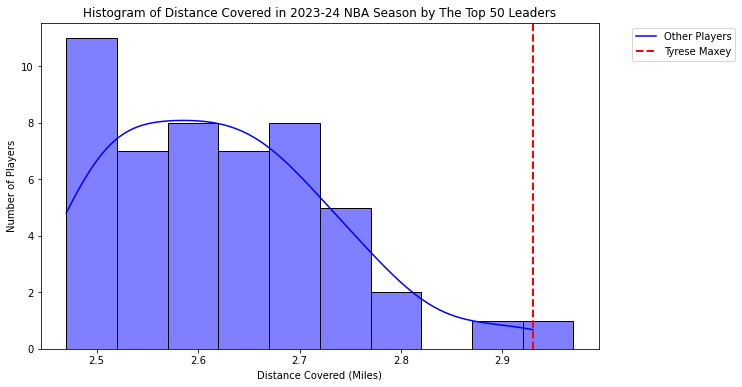

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the 2023-24 season
season_2023_24_df = maxey_speed_df[maxey_speed_df['Year'] == '2023-24']

# Identify Maxey's data
maxey_data = season_2023_24_df[season_2023_24_df['PLAYER'] == 'Tyrese Maxey']

# Distance covered by Maxey
maxey_distance = maxey_data['DIST. MILES'].iloc[0]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(season_2023_24_df['DIST. MILES'], kde=True, color='blue', binwidth=0.05)
plt.axvline(maxey_distance, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Histogram of Distance Covered in 2023-24 NBA Season by The Top 50 Leaders')
plt.xlabel('Distance Covered (Miles)')
plt.ylabel('Number of Players')
plt.legend(['Other Players', 'Tyrese Maxey'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Tyrese Maxey has covered the most distance in the NBA this season and was even impressive when compared to the top 50 leaders in distance covered. His increased usage and transition and handoff scoring could be factors.

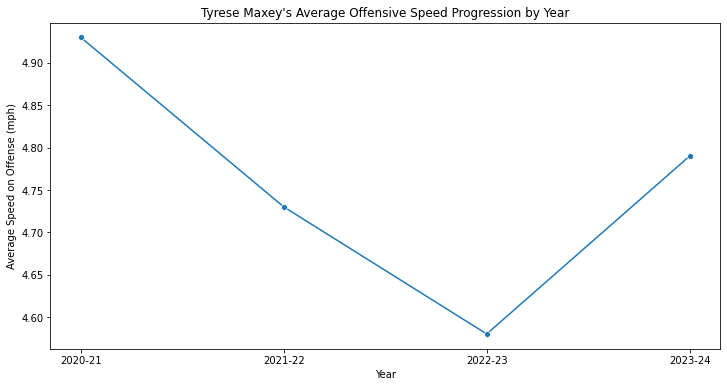

In [6]:
# Creating a line chart to show the progression of Tyrese Maxey's average offensive speed through each year.

# Filter the data to include only Tyrese Maxey's records
maxey_records = maxey_speed_df[maxey_speed_df['PLAYER'] == 'Tyrese Maxey']

# Extracting year and average offensive speed
maxey_yearly_speed = maxey_records[['Year', 'AVG SPEED OFF']]

# Sorting by Year
maxey_yearly_speed = maxey_yearly_speed.sort_values(by='Year')

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=maxey_yearly_speed, x='Year', y='AVG SPEED OFF', marker='o')

# Adding titles and labels
plt.title("Tyrese Maxey's Average Offensive Speed Progression by Year")
plt.xlabel('Year')
plt.ylabel('Average Speed on Offense (mph)')

# Show the plot
plt.show()


Maxey's speed on offense actually was dropping since his rookie season but has resurged this year. This could indicate the impact of more transition possessions and handoff plays.

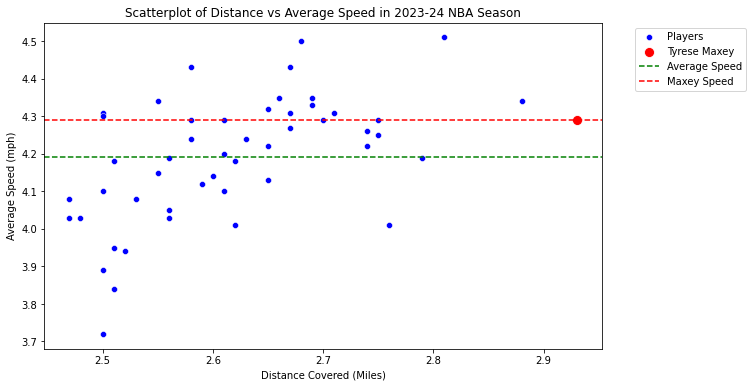

In [7]:
# Creating a scatterplot for the 2023-24 season with DIST. MILES on the X-axis and AVG Speed on the Y-axis.
# We will highlight the dot that represents Maxey.

# Filter the data for the 2023-24 season
season_2023_24_df = maxey_speed_df[maxey_speed_df['Year'] == '2023-24']

# Identify Maxey's data
maxey_data_2023_24 = season_2023_24_df[season_2023_24_df['PLAYER'] == 'Tyrese Maxey']

# Calculate the average distance and average speed for the 2023-24 season
average_distance = season_2023_24_df['DIST. MILES'].mean()
average_speed = season_2023_24_df['AVG SPEED'].mean()

# Create the scatterplot again
plt.figure(figsize=(10, 6))
sns.scatterplot(data=season_2023_24_df, x='DIST. MILES', y='AVG SPEED', color='blue')
sns.scatterplot(data=maxey_data_2023_24, x='DIST. MILES', y='AVG SPEED', color='red', s=100)

# Add horizontal lines for average distance and speed
plt.axhline(average_speed, color='green', linestyle='--')
plt.axhline(maxey_data_2023_24['AVG SPEED'].values[0], color='red', linestyle='--')

# Add titles and labels
plt.title('Scatterplot of Distance vs Average Speed in 2023-24 NBA Season')
plt.xlabel('Distance Covered (Miles)')
plt.ylabel('Average Speed (mph)')

# Adding a legend
plt.legend(['Players', 'Tyrese Maxey', 'Average Speed', 'Maxey Speed'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Maxey is covering a lot of distance and doing it quickly compared to the rest of the 50 league.

In [8]:
team_transition_points_df.head(5)

,Year,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FT\nFREQ%,TOV\nFREQ%,SF\nFREQ%,AND ONE\nFREQ%,SCORE\nFREQ%,PERCENTILE
0,2023-24,Oklahoma City Thunder,22,22.8,20.6,1.19,27.2,10.0,18.3,54.6,62.3,11.6,10.0,10.2,1.8,53.6,89.7
1,2023-24,Toronto Raptors,24,21.5,19.0,1.14,24.6,9.1,16.6,54.9,61.3,16.4,12.0,15.1,5.6,52.4,69.0
2,2023-24,Indiana Pacers,21,23.0,19.7,1.18,27.1,10.1,18.5,54.5,63.2,11.8,11.0,11.2,3.1,52.3,82.8
3,2023-24,Washington Wizards,23,20.7,18.4,1.19,24.7,9.5,16.3,58.1,64.7,13.0,12.2,12.2,4.0,54.8,93.1
4,2023-24,Atlanta Hawks,23,21.8,18.5,1.12,24.3,8.9,17.5,51.0,57.5,13.2,9.4,12.6,2.8,50.7,48.3


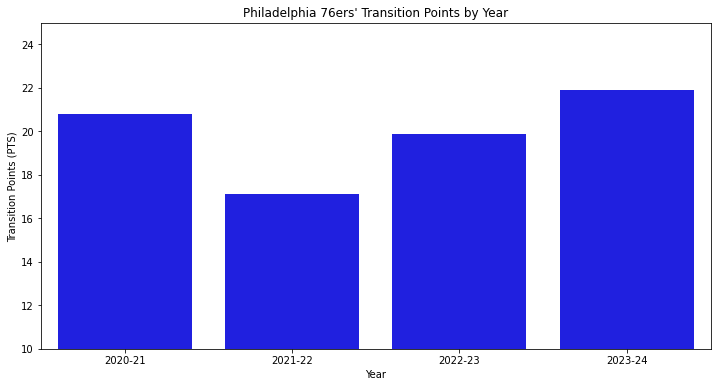

In [9]:
# Creating a bar chart to represent the Philadelphia 76ers' transition points (PTS) for each season.

# Filter the data to include only Philadelphia 76ers records
sixers_records = team_transition_points_df[team_transition_points_df['TEAM'] == 'Philadelphia 76ers']

# Extracting year and transition points
sixers_transition_points = sixers_records[['Year', 'PTS']]

# Sorting by Year
sixers_transition_points = sixers_transition_points.sort_values(by='Year')

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.ylim(10,25)
sns.barplot(data=sixers_transition_points, x='Year', y='PTS', color='blue')

# Adding titles and labels
plt.title("Philadelphia 76ers' Transition Points by Year")
plt.xlabel('Year')
plt.ylabel('Transition Points (PTS)')

# Show the plot
plt.show()


The Sixers transition points have increased each year since 2021-22 recovering their 2020-21 pace.

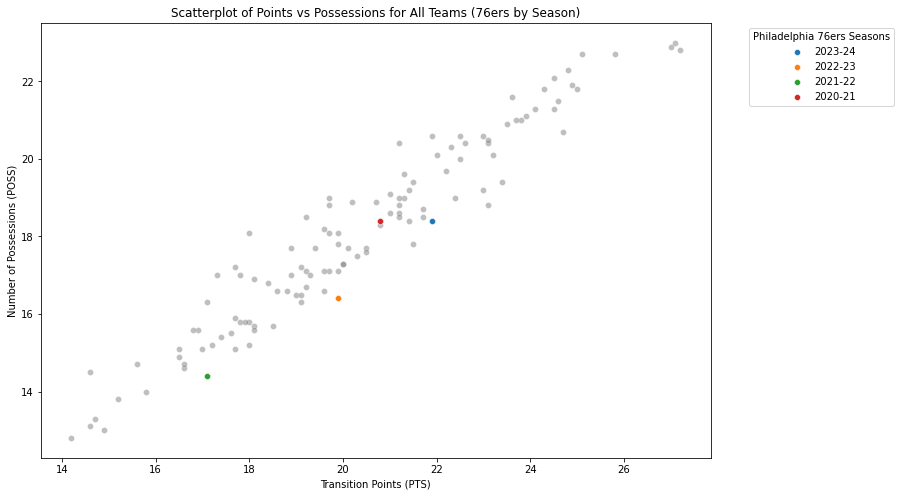

In [11]:
# Create the scatterplot for all teams
plt.figure(figsize=(12, 8))
sns.scatterplot(data=team_transition_points_df, x='PTS', y='POSS', color='grey', alpha=0.5)

sixers_data = team_transition_points_df[team_transition_points_df['TEAM'] == 'Philadelphia 76ers']

# Highlight each 76ers season with a unique color
for year in sixers_data['Year'].unique():
    season_data = sixers_data[sixers_data['Year'] == year]
    sns.scatterplot(data=season_data, x='PTS', y='POSS', label=year)

# Add titles and labels
plt.title('Scatterplot of Points vs Possessions for All Teams (76ers by Season)')
plt.xlabel('Transition Points (PTS)')
plt.ylabel('Number of Possessions (POSS)')

# Show the plot with a legend
plt.legend(title='Philadelphia 76ers Seasons', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The Sixers have have caught up to the rest of the in number of transition points and number of possessions in transition since 2021. The faster pace of play could be explained by increasing usage of Maxey's distance coverage and offensive speed.

In [28]:
player_transition_points_df[player_transition_points_df['PLAYER'] == 'Tyrese Maxey']

,Year,PLAYER,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FT\nFREQ%,TOV\nFREQ%,SF\nFREQ%,AND ONE\nFREQ%,SCORE\nFREQ%,PERCENTILE
17,2023-24,Tyrese Maxey,PHI,22,4.0,17.5,1.36,5.5,1.8,3.3,54.2,61.1,22.7,2.3,21.6,6.8,60.2,86.5
66,2022-23,Tyrese Maxey,PHI,60,3.5,19.4,1.43,5.0,1.8,2.9,62.0,70.2,18.6,5.2,17.1,7.6,62.9,92.9
130,2021-22,Tyrese Maxey,PHI,75,2.9,18.4,1.35,3.9,1.4,2.3,62.0,68.7,18.0,8.3,17.1,5.1,60.8,85.8
200,2020-21,Tyrese Maxey,PHI,22,4.0,17.5,1.36,5.5,1.8,3.3,54.2,61.1,22.7,2.3,21.6,6.8,60.2,86.5


Maxey's transition points have increased in over the past two years returning to his rookie season high.

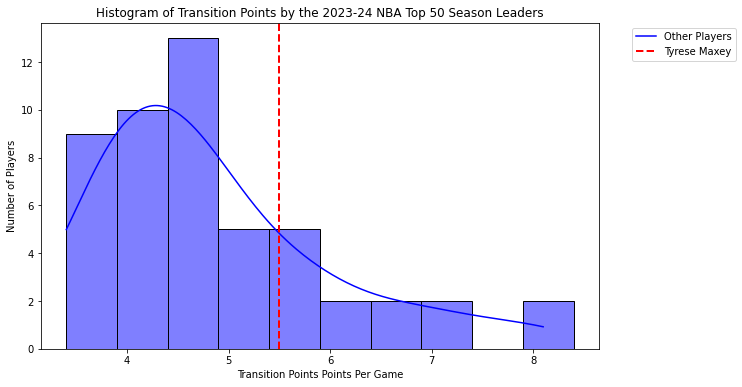

In [20]:
# Filter the data for the 2023-24 season
season_2023_24_df = player_transition_points_df[player_transition_points_df['Year'] == '2023-24']

# Filter for Tyrese Maxey's data in the 2023-24 season
maxey_data_2023_24 = season_2023_24_df[season_2023_24_df['PLAYER'] == 'Tyrese Maxey']

# Transition points for Maxey in the 2023-24 season
maxey_transition_points_2023_24 = maxey_data_2023_24['PTS'].iloc[0]

# Create the histogram for the 2023-24 season
plt.figure(figsize=(10, 6))
sns.histplot(season_2023_24_df['PTS'], kde=True, color='blue', binwidth=0.5)
plt.axvline(maxey_transition_points_2023_24, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Histogram of Transition Points by the 2023-24 NBA Top 50 Season Leaders')
plt.xlabel('Transition Points Points Per Game')
plt.ylabel('Number of Players')
plt.legend(['Other Players', 'Tyrese Maxey'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Compared to the the best transition scorers in the NBA Maxey has been very strong but still has room for improvement.

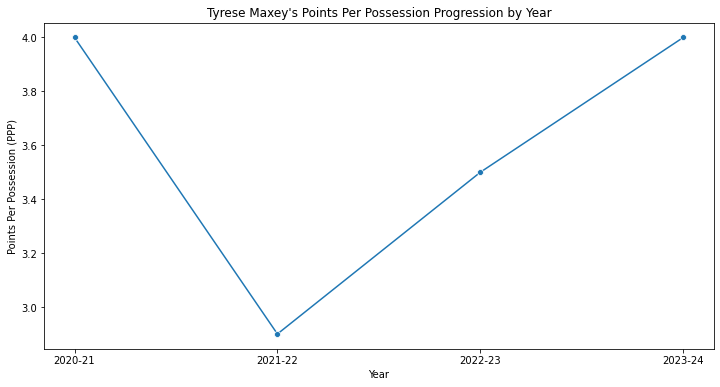

In [25]:
# Creating a line chart to show the progression of Tyrese Maxey's points per possession (PPP) through each year of his career.

# Filter the data to include only Tyrese Maxey's records
maxey_career_records = player_transition_points_df[player_transition_points_df['PLAYER'] == 'Tyrese Maxey']

# Extracting year and points per possession
maxey_yearly_ppp = maxey_career_records[['Year', 'POSS']]

# Sorting by Year
maxey_yearly_ppp = maxey_yearly_ppp.sort_values(by='Year')

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=maxey_yearly_ppp, x='Year', y='POSS', marker='o')

# Adding titles and labels
plt.title("Tyrese Maxey's Points Per Possession Progression by Year")
plt.xlabel('Year')
plt.ylabel('Points Per Possession (PPP)')

# Show the plot
plt.show()

Maxey's possessions in transition have spiked this season compared to the past two years but was identical to his rookie year.

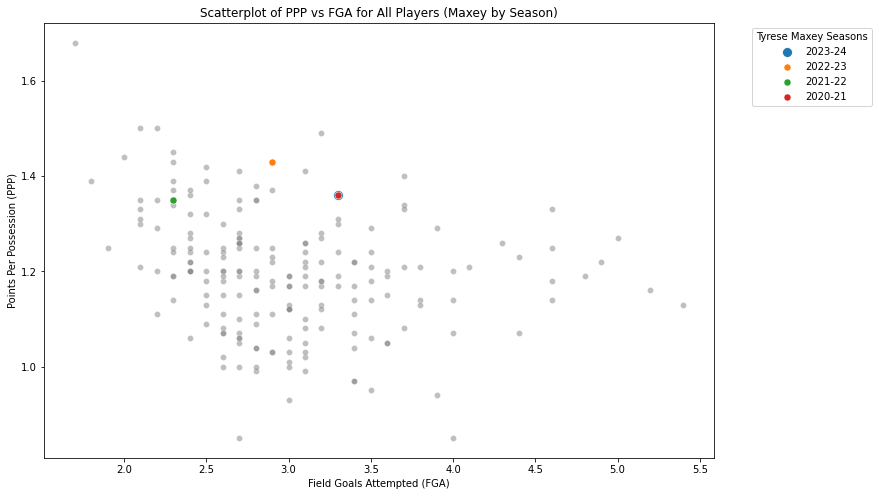

In [29]:
# Recreating the scatterplot with an emphasis on Maxey's 2023-24 season data

# Create the scatterplot for all players
plt.figure(figsize=(12, 8))
sns.scatterplot(data=player_transition_points_df, x='FGA', y='PPP', color='grey', alpha=0.5)

# Highlight each Tyrese Maxey season with a unique color
for year in maxey_career_records['Year'].unique():
    season_data = maxey_career_records[maxey_career_records['Year'] == year]
    sns.scatterplot(data=season_data, x='FGA', y='PPP', label=year, s=100 if year == '2023-24' else 50)

# Add titles and labels
plt.title('Scatterplot of PPP vs FGA for All Players (Maxey by Season)')
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Points Per Possession (PPP)')

# Enhance the visibility of the 2023-24 season dot
plt.legend(title='Tyrese Maxey Seasons', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Tyrese Maxey's efficiency in transition this year is almost exactly the same as in 2020-21 on the same amount of attempts per game. At the same time his points per possession decreased a bit this year. This confirms that the increase in points is likely due to increased number of transition possessions.